In [1]:
import  cv2
import os 

os.getcwd()

'd:\\donatio-AI\\src\\kpay_detect'

In [2]:
os.chdir("D:\\donatio-AI\\src\\kpay_detect\\data")

In [106]:
image = cv2.imread(os.getcwd()+"\\kpay_second.jpg")
if image is None:
    print("Your directory is wrong")
else:
    print(f"Your path is correct")

Your path is correct


In [107]:
print("Image shape: ", image.shape)

Image shape:  (1280, 590, 3)


In [108]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

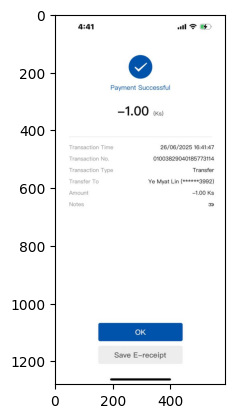

In [109]:
from matplotlib import pyplot as plt 

plt.imshow(img)

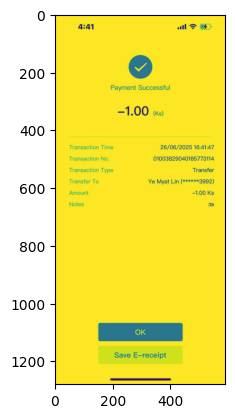

In [110]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

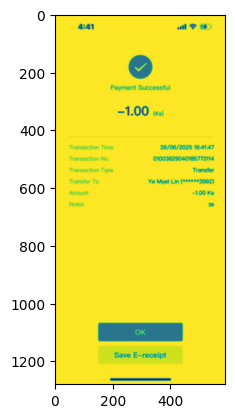

In [111]:
blur_image=  cv2.GaussianBlur(gray_image,(5,5),3)
plt.imshow(blur_image)

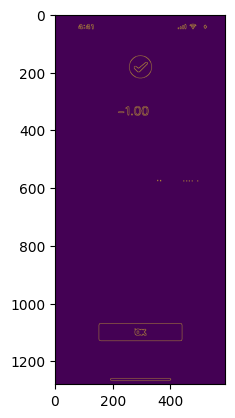

In [112]:
thresh = cv2.threshold(blur_image, 104, 150, cv2.THRESH_BINARY)[1]
gray = cv2.bilateralFilter(thresh, 1, 188, 260)

imgThreshold = cv2.Canny(gray, 1, 10,apertureSize=3)
plt.imshow(imgThreshold)

In [113]:
import numpy as np 

def reorder(myPoints):
    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] = myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]

    return myPointsNew

Invalid that is raw
Total valid rectangles: 0


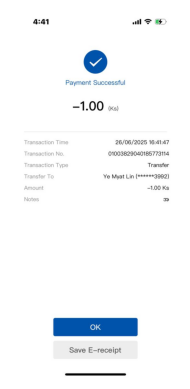

In [116]:
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rgb = img.copy()
rect_list = []

for i in contours:
    area = cv2.contourArea(i)
    if area > 8000:
        peri = cv2.arcLength(i, True)
        approx = cv2.approxPolyDP(i, 0.02 * peri, True)

        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h

            if 0.6 < aspect_ratio < 1.4 and w > 100 and h > 100:
                reordered = reorder(approx[:4])
                rect_list.append(reordered)

                cv2.drawContours(rgb, [approx], -1, (0, 255, 0), 2)
                print("Valid contour:", approx[:4])
                print()
            else:
                print("Invalid that is raw")

print("Total valid rectangles:", len(rect_list))
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [115]:
crop_img = img.copy()

i = 1

rect_result = rect_list
rect_result

[]

In [93]:
print(len(rect_result))
print(rect_result)

1
[array([[[  42,   62]],

       [[ 681,   65]],

       [[  39, 1127]],

       [[ 678, 1130]]], dtype=int32)]


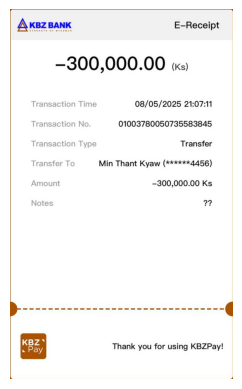

In [94]:
rect = rect_result[0] 
coords = rect.reshape(-1, 2)  # Shape: (4, 2)

xindexs = coords[:, 0]
yindexs = coords[:, 1]

x1, x2 = np.min(xindexs), np.max(xindexs)
y1, y2 = np.min(yindexs), np.max(yindexs)

x1, x2 = max(0, x1), min(crop_img.shape[1], x2)
y1, y2 = max(0, y1), min(crop_img.shape[0], y2)

cropped_img = crop_img[y1:y2, x1:x2, :]

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [95]:
import easyocr
reader = easyocr.Reader(['en']) # english

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [96]:
bgr_image = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
results = reader.readtext(bgr_image)

In [97]:
results

[([[np.int32(54), np.int32(32)],
   [np.int32(182), np.int32(32)],
   [np.int32(182), np.int32(62)],
   [np.int32(54), np.int32(62)]],
  'KBZ BANK',
  np.float64(0.987243893876667)),
 ([[np.int32(470), np.int32(32)],
   [np.int32(608), np.int32(32)],
   [np.int32(608), np.int32(64)],
   [np.int32(470), np.int32(64)]],
  'E-Receipt',
  np.float64(0.9990856146378514)),
 ([[np.int32(122), np.int32(117)],
   [np.int32(456), np.int32(117)],
   [np.int32(456), np.int32(195)],
   [np.int32(122), np.int32(195)]],
  '-300,000.00',
  np.float64(0.5105484921802714)),
 ([[np.int32(462), np.int32(152)],
   [np.int32(518), np.int32(152)],
   [np.int32(518), np.int32(184)],
   [np.int32(462), np.int32(184)]],
  '(Ks)',
  np.float64(0.9999912977218628)),
 ([[np.int32(58), np.int32(262)],
   [np.int32(252), np.int32(262)],
   [np.int32(252), np.int32(286)],
   [np.int32(58), np.int32(286)]],
  'Transaction Time',
  np.float64(0.9864606393338228)),
 ([[np.int32(356), np.int32(260)],
   [np.int32(584), n

In [98]:
results[11] 

([[np.int32(254), np.int32(432)],
  [np.int32(584), np.int32(432)],
  [np.int32(584), np.int32(462)],
  [np.int32(254), np.int32(462)]],
 'Min Thant Kyaw (******4456)',
 np.float64(0.818492477642274))

In [99]:
results[13] 

([[np.int32(406), np.int32(490)],
  [np.int32(586), np.int32(490)],
  [np.int32(586), np.int32(518)],
  [np.int32(406), np.int32(518)]],
 '-300,000.00 Ks',
 np.float64(0.7808907568358757))

In [100]:
name_and_phone = results[11][1]
name_and_phone

'Min Thant Kyaw (******4456)'

In [101]:
amount = results[13][1]
amount

'-300,000.00 Ks'

In [102]:
import re 

clean_amount = int(re.sub(r'\.00$', '', re.sub(r'[^\d.]', '', amount)))
clean_amount

300000

In [103]:
name, phone = re.match(r'^(.*?)\s*\((.*?)\)$', name_and_phone).groups()
print(name)
print(phone)

Min Thant Kyaw
******4456
